In [145]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [146]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [147]:
# 由 Keras 讀入 MNIST
from keras.datasets import mnist

In [148]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [149]:
# 輸入格式整理
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# 正規化 將資料線性單位化至  [0,1] 。
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [150]:
# 輸出格式整理 
from keras.utils import np_utils

In [151]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [152]:
# 決定神經網路架構、讀入相關套件
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta

In [158]:
# 建構我們的神經網路
model = Sequential()

In [159]:
# padding 設成 same 是每個 filter 會輸出原來 28x28 一樣大小的矩陣。

# filter, 矩陣
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
# Max-Pooling!
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [160]:
# 將資料拉平成
model.add(Flatten())
# 神經元
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [161]:
# 組裝
model.compile(loss="categorical_crossentropy", optimizer=Adadelta(), metrics=['accuracy'])
# 檢視我們的神經網路
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
activation_59 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_60 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 32)          4640      
__________

In [162]:
# 訓練神經網路
model_fit = model.fit(x_train, y_train, batch_size = 100, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 741us/step - loss: 0.3160 - acc: 0.8984 - val_loss: 0.0763 - val_acc: 0.9753
Epoch 2/5
60000/60000 [==============================] - 43s 710us/step - loss: 0.0761 - acc: 0.9768 - val_loss: 0.0516 - val_acc: 0.9825
Epoch 3/5
60000/60000 [==============================] - 43s 718us/step - loss: 0.0569 - acc: 0.9822 - val_loss: 0.0467 - val_acc: 0.9846
Epoch 4/5
60000/60000 [==============================] - 44s 733us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0447 - val_acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 48s 796us/step - loss: 0.0404 - acc: 0.9874 - val_loss: 0.0360 - val_acc: 0.9874


10000/10000 [==============================] - 3s 303us/step
測試資料的 loss: 0.03597
測試資料的正確率: 0.9874


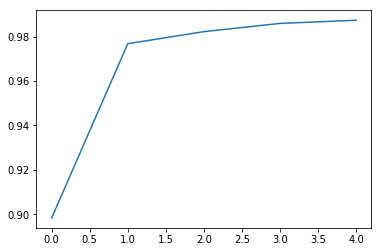

In [163]:
# 檢視準確率
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

plt.plot(model_fit.history["acc"])

In [164]:
# 訓練好的神經網路存起來!
model.save('myCNNmodel.h5')

In [165]:
predict = model.predict_classes(x_test)

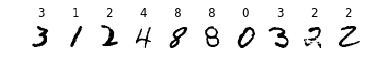

In [166]:
# 每次選 10 個顯示, 看是不是有正確辨識。
pick = np.random.randint(1,9999, 10)

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")